In [1]:
import nltk
import sklearn
import pandas as pd
import numpy as np
from nltk.corpus import CategorizedPlaintextCorpusReader
from nltk import FreqDist
from nltk.corpus import stopwords
import string
import re
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
# project module
from benchmark import get_benchmark
from yellowbrick.text import FreqDistVisualizer
from sklearn.feature_extraction.text import CountVectorizer
from os import path
import os
import seaborn as sns
sns.set()
from wordcloud import WordCloud
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

/Users/septem/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [9]:
def plot_result(results):
    indices = np.arange(len(results))

    results = [[x[i] for x in results] for i in range(4)]

    clf_names, score, training_time, test_time = results
    training_time = np.array(training_time) / np.max(training_time)
    test_time = np.array(test_time) / np.max(test_time)

    plt.figure(figsize=(12, 8))
    plt.title("Score")
    plt.barh(indices, score, .2, label="score", color='navy')
    plt.barh(indices + .3, training_time, .2, label="training time",
             color='c')
    plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
    plt.yticks(())
    plt.legend(loc='best')
    plt.subplots_adjust(left=.25)
    plt.subplots_adjust(top=.95)
    plt.subplots_adjust(bottom=.05)

    for i, c in zip(indices, clf_names):
        plt.text(-.3, i, c)

    plt.show()

def corpus_to_df(corpus, language = 'all'):
    d = []
    for id in corpus.fileids():
        cat = corpus.categories(id)[0]
        lang, innov = cat.split('/')
        d.append([id, lang, innov])
    df = pd.DataFrame(d, columns=['id', 'lang', 'innov'])
    df['innov_'] = df['innov'].apply(lambda x: 1 if x=='innov' else 0)
    if language == 'all':
        return df
    elif np.any(df['lang'] == language):
        return df[df['lang'] == language]
    else:
        raise Exception('language is not found in the dataframe')


In [3]:
doc_pattern = r'.*\.txt';
cat_pattern = r'([\w_/]+)/.*';
corpus_en_cleaned =CategorizedPlaintextCorpusReader('/Users/septem/Downloads/companies_cleaned/en/', doc_pattern, cat_pattern=cat_pattern)
corpus_nl_cleaned =CategorizedPlaintextCorpusReader('/Users/septem/Downloads/companies_cleaned/nl/', doc_pattern, cat_pattern=cat_pattern)
corpus_cleaned = CategorizedPlaintextCorpusReader('/Users/septem/Downloads/companies_cleaned/', doc_pattern, cat_pattern = cat_pattern)
len(corpus_en_cleaned.fileids()), len(corpus_nl_cleaned.fileids())

(900, 3884)

In [6]:
df = corpus_to_df(corpus_cleaned)
x_train, x_test, y_train, y_test = train_test_split(df['id'], df['innov_'], test_size=0.1, stratify = df['innov_'], random_state=42)
tfidf = TfidfVectorizer()
x_train_tfidf = tfidf.fit_transform(corpus_cleaned.raw(id) for id in x_train)
x_test_tfidf = tfidf.transform(corpus_cleaned.raw(id) for id in x_test)

Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None, solver='sag',
                tol=0.01)


/Users/septem/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:557: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '


train time: 2.577s
test time:  0.003s
accuracy:   0.633
dimensionality: 362446
density: 1.000000
classification report:
              precision    recall  f1-score   support

      others       0.61      0.52      0.56       219
       innov       0.64      0.73      0.68       263

    accuracy                           0.63       482
   macro avg       0.63      0.62      0.62       482
weighted avg       0.63      0.63      0.63       482

confusion matrix:


<Figure size 432x288 with 0 Axes>

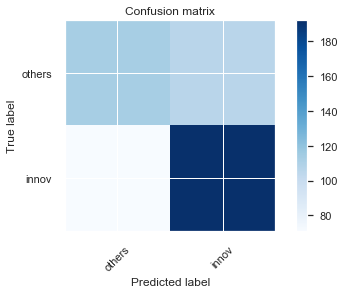


Perceptron
________________________________________________________________________________
Training: 
Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=50, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)
train time: 0.205s
test time:  0.002s
accuracy:   0.602
dimensionality: 362446
density: 0.817744
classification report:
              precision    recall  f1-score   support

      others       0.58      0.43      0.50       219
       innov       0.61      0.74      0.67       263

    accuracy                           0.60       482
   macro avg       0.60      0.59      0.58       482
weighted avg       0.60      0.60      0.59       482

confusion matrix:


<Figure size 432x288 with 0 Axes>

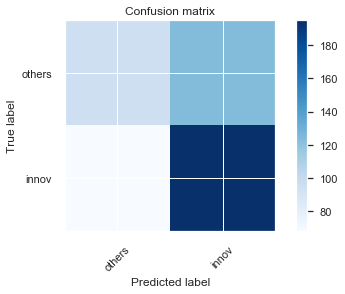


Passive-Aggressive
________________________________________________________________________________
Training: 
PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=50, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)
train time: 0.697s
test time:  0.002s
accuracy:   0.614
dimensionality: 362446
density: 0.996121
classification report:
              precision    recall  f1-score   support

      others       0.57      0.60      0.58       219
       innov       0.65      0.63      0.64       263

    accuracy                           0.61       482
   macro avg       0.61      0.61      0.61       482
weighted avg       0.62      0.61      0.61       482

confusion matrix:


<Figure size 432x288 with 0 Axes>

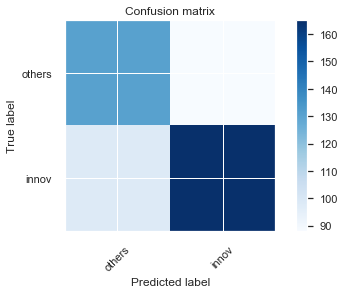


kNN
________________________________________________________________________________
Training: 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')
train time: 0.031s
test time:  1.360s
accuracy:   0.581
classification report:
              precision    recall  f1-score   support

      others       0.53      0.65      0.59       219
       innov       0.64      0.52      0.58       263

    accuracy                           0.58       482
   macro avg       0.59      0.59      0.58       482
weighted avg       0.59      0.58      0.58       482

confusion matrix:


<Figure size 432x288 with 0 Axes>

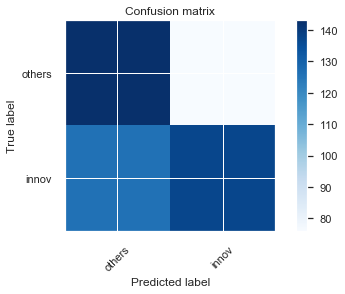


Random forest
________________________________________________________________________________
Training: 
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
train time: 183.632s
test time:  0.401s
accuracy:   0.631
classification report:
              precision    recall  f1-score   support

      others       0.61      0.51      0.55       219
       innov       0.64      0.73      0.68       263

    accuracy                           0.63       482
   macro avg       0.63      0.62      0.62    

<Figure size 432x288 with 0 Axes>

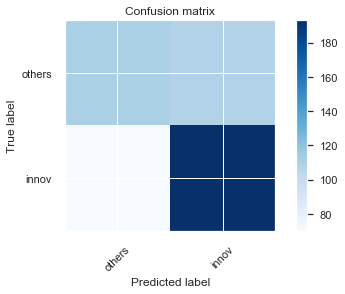


L2 penalty
________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.001,
          verbose=0)
train time: 1.306s
test time:  0.002s
accuracy:   0.624
dimensionality: 362446
density: 1.000000
classification report:
              precision    recall  f1-score   support

      others       0.60      0.53      0.56       219
       innov       0.64      0.70      0.67       263

    accuracy                           0.62       482
   macro avg       0.62      0.62      0.62       482
weighted avg       0.62      0.62      0.62       482

confusion matrix:


<Figure size 432x288 with 0 Axes>

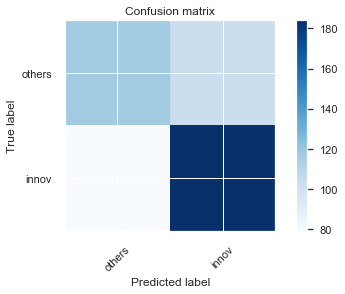


________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=50,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
train time: 0.568s
test time:  0.002s
accuracy:   0.620
dimensionality: 362446
density: 0.991475
classification report:
              precision    recall  f1-score   support

      others       0.59      0.55      0.57       219
       innov       0.64      0.68      0.66       263

    accuracy                           0.62       482
   macro avg       0.62      0.61      0.61       482
weighted avg       0.62      0.62      0.62       482

confusion matrix:


<Figure size 432x288 with 0 Axes>

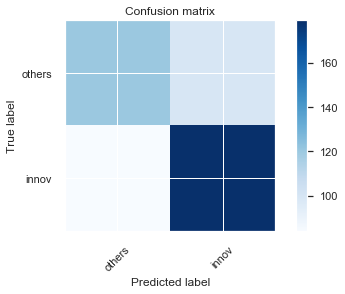


L1 penalty
________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
          verbose=0)
train time: 0.872s
test time:  0.003s
accuracy:   0.629
dimensionality: 362446
density: 0.005488
classification report:
              precision    recall  f1-score   support

      others       0.62      0.47      0.54       219
       innov       0.63      0.76      0.69       263

    accuracy                           0.63       482
   macro avg       0.63      0.62      0.61       482
weighted avg       0.63      0.63      0.62       482

confusion matrix:


<Figure size 432x288 with 0 Axes>

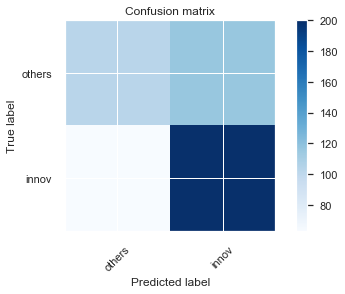


________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=50,
              n_iter_no_change=5, n_jobs=None, penalty='l1', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
train time: 2.317s
test time:  0.002s
accuracy:   0.645
dimensionality: 362446
density: 0.008567
classification report:
              precision    recall  f1-score   support

      others       0.64      0.50      0.56       219
       innov       0.65      0.76      0.70       263

    accuracy                           0.65       482
   macro avg       0.64      0.63      0.63       482
weighted avg       0.64      0.65      0.64       482

confusion matrix:


<Figure size 432x288 with 0 Axes>

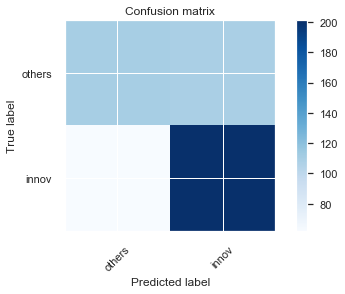


Elastic-Net penalty
________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=50,
              n_iter_no_change=5, n_jobs=None, penalty='elasticnet',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
train time: 3.209s
test time:  0.003s
accuracy:   0.624
dimensionality: 362446
density: 0.068689
classification report:
              precision    recall  f1-score   support

      others       0.59      0.56      0.57       219
       innov       0.65      0.68      0.66       263

    accuracy                           0.62       482
   macro avg       0.62      0.62      0.62       482
weighted avg       0.62      0.62      0.62       482

confusion 

<Figure size 432x288 with 0 Axes>

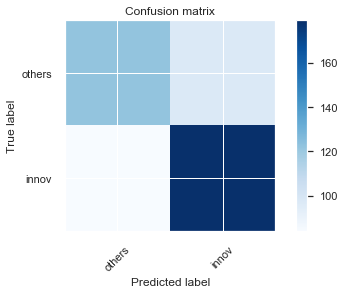


NearestCentroid (aka Rocchio classifier)
________________________________________________________________________________
Training: 
NearestCentroid(metric='euclidean', shrink_threshold=None)
train time: 0.106s
test time:  0.012s
accuracy:   0.585
classification report:
              precision    recall  f1-score   support

      others       0.53      0.72      0.61       219
       innov       0.67      0.47      0.55       263

    accuracy                           0.59       482
   macro avg       0.60      0.60      0.58       482
weighted avg       0.61      0.59      0.58       482

confusion matrix:


<Figure size 432x288 with 0 Axes>

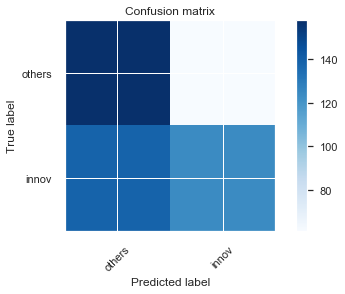


Naive Bayes
________________________________________________________________________________
Training: 
MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)
train time: 0.062s
test time:  0.008s
accuracy:   0.629
dimensionality: 362446
density: 1.000000
classification report:
              precision    recall  f1-score   support

      others       0.58      0.63      0.61       219
       innov       0.67      0.63      0.65       263

    accuracy                           0.63       482
   macro avg       0.63      0.63      0.63       482
weighted avg       0.63      0.63      0.63       482

confusion matrix:


<Figure size 432x288 with 0 Axes>

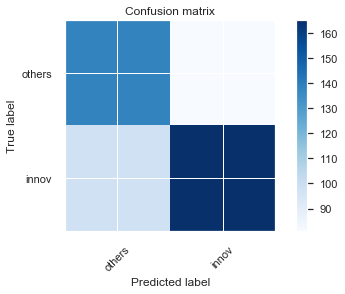


________________________________________________________________________________
Training: 
BernoulliNB(alpha=0.01, binarize=0.0, class_prior=None, fit_prior=True)
train time: 0.089s
test time:  0.023s
accuracy:   0.616
dimensionality: 362446
density: 1.000000
classification report:
              precision    recall  f1-score   support

      others       0.55      0.82      0.66       219
       innov       0.75      0.45      0.56       263

    accuracy                           0.62       482
   macro avg       0.65      0.63      0.61       482
weighted avg       0.66      0.62      0.61       482

confusion matrix:


<Figure size 432x288 with 0 Axes>

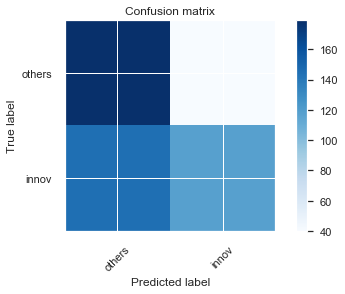


________________________________________________________________________________
Training: 
ComplementNB(alpha=0.1, class_prior=None, fit_prior=True, norm=False)
train time: 0.053s
test time:  0.010s
accuracy:   0.629
dimensionality: 362446
density: 1.000000
classification report:
              precision    recall  f1-score   support

      others       0.61      0.51      0.56       219
       innov       0.64      0.73      0.68       263

    accuracy                           0.63       482
   macro avg       0.62      0.62      0.62       482
weighted avg       0.63      0.63      0.62       482

confusion matrix:


<Figure size 432x288 with 0 Axes>

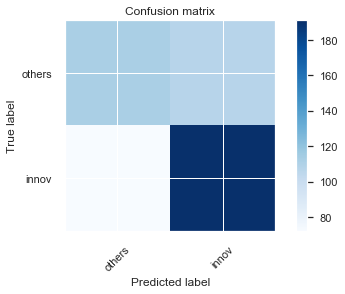


LinearSVC with L1-based feature selection
________________________________________________________________________________
Training: 
Pipeline(memory=None,
         steps=[('feature_selection',
                 SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     loss='squared_hinge',
                                                     max_iter=1000,
                                                     multi_class='ovr',
                                                     penalty='l1',
                                                     random_state=None,
                                                     tol=0.001, verbose=0),
                                 max_features=None, norm_order=1, prefit=False,
    

<Figure size 432x288 with 0 Axes>

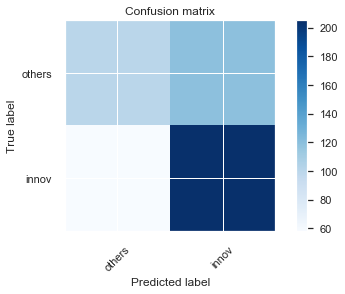

In [7]:
results = get_benchmark(x_train_tfidf, y_train, x_test_tfidf, y_test)

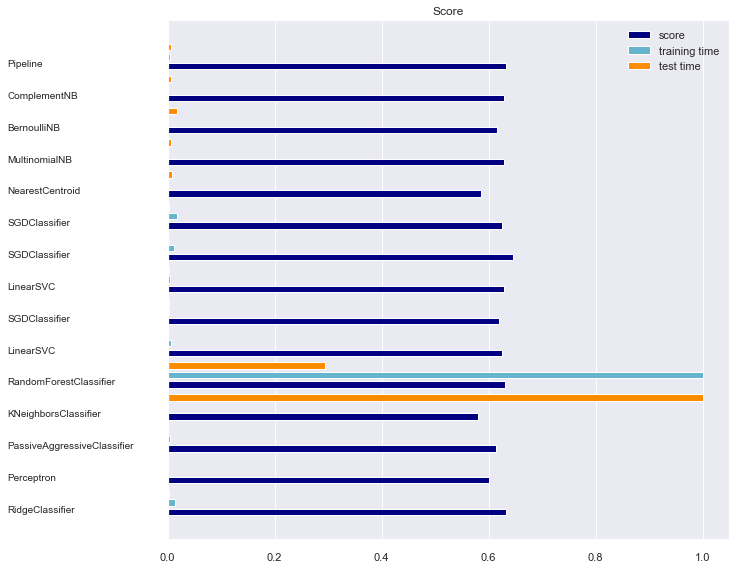

In [11]:
plot_result(results)